<a href="https://colab.research.google.com/github/JuliethLopez/NLTK_prueba/blob/master/IntroNLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> Introducción a NLTK (Natural Language Toolkit)</h1> 

#### Referancias
- _Nitin Hardeniya - NLTK Essentials-Packt Publishing (2015)_
- https://www.kaggle.com/alvations/n-gram-language-model-with-nltk
- https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/
- Las-Wordnet https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/LAS-WordNet-una-WordNet-para-el-espa-ol-obtenida-c/8z8d-85m7



En este cuaderno se busca introducir el uso de la API NLTK, se exlicara tanto con datos en inglés como en español. Si bien esta API fue diseñada inicalmente para la lengua inglesa, varios tokenizadores fueron bien entrenados después para trabajar con varios idiomas.

## ¿Qué es text wrangling(discusión de texto)?

Es dificil de definir el termino *text wrangling*, pero en esencia es el pre-procesamiento y el trabajo pesado que debe hacerse para que los datos sean legibles para la maquina, el proceso involucra *data munging* que es la mezcla y cambio de formato de los datos, limpieza de los datos, preprocesamiento especifico, tokenización, derivación o lematización y la eliminación de las palabras de parada.

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import nltk
import tensorflow as tf
import numpy as np
import os

In [ ]:
#pip install nltk

In [ ]:
nltk.download() #download all

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

La lectura de los datos va a depender del formato de los datos, veamos unicamente como extraer los datos de texto en formato html porque, el proceso que le sigue se repite para el formato txt o una entrada directa tipo caracter.

In [ ]:
import urllib.request #para abrir el link

response = urllib.request.urlopen('http://php.net')
html = response.read() #leer los datos
#print(html)

In [ ]:
from bs4 import BeautifulSoup #para limpiar texto, elimina etiquetas html

soup = BeautifulSoup(html,"html5lib") #limpiar texto
text = soup.get_text(strip=True)
#print (text)

Después de tener los datos empezamos con el tokenizador *punkt* que divide un texto en una lista de oraciones. Esto nos lleva a nuestro primer ejemplo de discusión de texto: división de oraciones.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### División de oraciones
La mejor manera de analizar un texto es dividiendolo en oraciones. En conversaciones de la vida real, también calculamos información a nivel de oración analizando palabras conjuntas. La división por oraciones tambien se llama tokenización por oraciones.

In [ ]:
sampleString = "Let’s make this our sample paragraph. It will split at the end of a sentence marker, like a period. It even knows that the period in Mr. Jones is not the end. Try it out!"

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
tokenized_sent = sent_tokenize(sampleString)
print(tokenized_sent)

['Let’s make this our sample paragraph.', 'It will split at the end of a sentence marker, like a period.', 'It even knows that the period in Mr. Jones is not the end.', 'Try it out!']


### Tokenización
Un token es la unidad de texto más pequeña que una máquina puede procesar. Por lo tanto, cada fragmento de texto debe ser tokenizado antes de poder ejecutar programas de lenguaje natural con él. A veces, tiene sentido que la unidad más pequeña sea una palabra o una letra. Si bien es posible realizar este proceso manumelte con la función split(), que busca espacios como delimitadores y toma las palabras a su alrededor,

>*tokens = msg.split #convertimos el texto en tokens*

La libreria NLTK nos ofrece una función no solo para obtener los tokens por oración sino tambien por palabras.

In [ ]:
#función mas simple: split()
msg = "Hey everyone! The party starts in 10mins. Be there ASAP!"
print(msg.split())

['Hey', 'everyone!', 'The', 'party', 'starts', 'in', '10mins.', 'Be', 'there', 'ASAP!']


In [ ]:
#función de NLTK: word_tokenize
from nltk.tokenize import word_tokenize, regexp_tokenize

In [ ]:
word_tokenize(msg)

['Hey',
 'everyone',
 '!',
 'The',
 'party',
 'starts',
 'in',
 '10mins',
 '.',
 'Be',
 'there',
 'ASAP',
 '!']

NLTK nos ofrece una función incluso mas avanzada *regex_tokenize* que se personaliza para obtener resultados mas precisos, si comparamos con la anterior, vemos que esta función es capaz de eliminar algunos signos de puntuación que se habian considerado como palabras.

In [ ]:
regexp_tokenize(msg, pattern="\w+")

['Hey',
 'everyone',
 'The',
 'party',
 'starts',
 'in',
 '10mins',
 'Be',
 'there',
 'ASAP']

### Derivación
El proceso de derivación consiste en recortar la palabra de forma que se pueda obtener su raiz. Por ejemplo, si se toma la palabra “running”, se podrá cortar para obtener la raiz “run”.

In [ ]:
from nltk.stem import PorterStemmer #algoritmo PorterStemmer

porter = PorterStemmer()
porter.stem("running")

'run'

In [ ]:
from nltk.stem import LancasterStemmer #algoritmo LancasterStemmer

lancaster = LancasterStemmer() 
lancaster.stem("eating")

'eat'

In [ ]:
from nltk.stem.snowball import SnowballStemmer #este algoritmo se usa para palabras en varios idiomas
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [ ]:
snowball = SnowballStemmer("english")
snowball.stem("having")

'have'

In [ ]:
snowball = SnowballStemmer("spanish")
snowball.stem("comiendo")

'com'

### Lematización
Como vimos, el resultado no es muy bueno, por lo que se debe recurrir a una función mas avanzada, la lematización. La lematización en lugar de solo seguir ciertas reglas, tambien toma en cuenta el contexto y parte del discurso para determinar el lema, o la raíz de la palabra, y aunque el resultado sea un sinonimo, sabemos que el significado es el mismo.

Por otro lado, aaunque la lematización es más lenta que la derivación, tambien resulta más precisa y permite encontrar diferentes tipos de palabras, como verbos, sustantivos, adjetivos y adverbios.

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(lem.lemmatize("increases")) #lematización
print(porter.stem("increases")) #derivación

increase
increas


In [ ]:
#para encontrar otras palabras
print(lem.lemmatize('playing', pos="v")) #verbos
print(lem.lemmatize('playing', pos="n")) #sustantivos
print(lem.lemmatize('playing', pos="a")) #adjetivos
print(lem.lemmatize('playing', pos="r")) #adverbios

play
playing
playing
playing


### ¿Qué es la Wordnet?
Es una base de datos léxica que agrupa palabras en conjuntos de sinónimos, definiciones cortas y generales y almacena las relaciones semánticas entre los conjuntos de sinónimos, es usado para desambiguar el significado de las palabras, y hacer para la maquina más facil su tarea.

In [ ]:
from nltk.corpus import wordnet as wn

syn = wn.synsets("pain")

print(syn[0].definition()) #incluye definiciones
print(syn[0].examples()) #incluye ejemplos

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [ ]:
#sinonimos
synonyms = []

for syn in wn.synsets('computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())

print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


In [ ]:
#antonimos
antonyms = []

for syn in wn.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(antonyms)

['large', 'big', 'big']


#### Las-wordnet
LAS-WordNet tiene un cubrimiento mayor del lenguaje que otras versiones de WordNet para el español, para obtenerla, debemos descargar el recurso con el identificador “omw” y el nombre “Open Multilingual Wordnet”. Luego, debemos descargar el archivo wn-data-las.zip, que debe descomprimirse para obtener el archivo wn-data-las.tab. En computadoras con sistema operativo Windows se debe ubicar el siguiente directorio:

C:\Users\\AppData\Roaming\nltk_data\corpora\omw

In [ ]:
#Configuración para utilizar los datos con nltk
nltk.download("omw")

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

Links para datos en español,
- http://timm.ujaen.es/recursos/spanish-wordnet-3-0/
- https://www.datos.gov.co/api/views/8z8d-85m7/files/da7b9399-79b4-4069-8e2f-44ca4a4eb359?download=true&filename=wn-data-las.zip
- http://lod.iula.upf.edu/resources/metadata-WordnetLMF-ES

In [1]:
#Bajar los datos de Las-wordnet
zip_path = tf.keras.utils.get_file(
    origin='https://www.datos.gov.co/api/views/8z8d-85m7/files/da7b9399-79b4-4069-8e2f-44ca4a4eb359?download=true&filename=wn-data-las.zip',
    fname='wn-data-las.zip',
    extract=True)
#ruta de donde quedaron guardados los datos
wn_data_las, _ = os.path.splitext(zip_path)

NameError: ignored

In [ ]:
wn_data_las

Luego se debe crear un subdirectorio en *C:\Users\\AppData\Roaming\nltk_data\corpora\omw* con el nombre “las” y moverse a ese subdirectorio usando los siguientes comandos:

> md las 

> cd las

Luego se debe copiar el archivo wn-data-las.tab en ese directorio.

> copy c:\temporal\wn-data-las.tab

In [ ]:
#deberia funcionar cuando esté todo descargado
wn.synsets("casa",lang="las")

### Eliminación de palabras de parada
Las palabras de parada son palabras de uso común que generalmente se ignoran debido a sus múltiples ocurrencias. La mayor parte de estas palabras son artículos y preposiciones en su respectivo idioma, como "the", "a", "in" en inglés, o "de", "un", "en" en español. Estas palabras pueden terminar ocupando demasiado espacio o consumiendo demasiado tiempo.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#eliminación de palabras de parada en inglés
list = stopwords.words('english')
paragraph = "This is a long paragraph of text. Somtimes important words like Apple and Machine Learning show up. Other words that are not important get removed."
postPara = [word for word in paragraph.split() if word not in list]
print(postPara)

['This', 'long', 'paragraph', 'text.', 'Somtimes', 'important', 'words', 'like', 'Apple', 'Machine', 'Learning', 'show', 'up.', 'Other', 'words', 'important', 'get', 'removed.']


Usaremos el siguiente texto para eliminar palabras de parada en español:
> Al despuntar la aurora, hazte estas consideraciones previas: me encontraré con un indiscreto, un ingrato, un insolente, un mentiroso, un envidioso, un insociable. Todo eso les acontece por ignorancia de los bienes y de los males. Pero yo, que he observado que la naturaleza del bien es lo bello, y que la del mal es lo vergonzoso, y que la naturaleza del pecador mismo es pariente de la mía, porque participa, no de la misma sangre o de la misma semilla, sino de la inteligencia y de una porción de la divinidad, no puedo recibir daño de ninguno de ellos, pues ninguno me cubrirá de vergüenza; ni puedo enfadarme con mi pariente ni odiarle. Pues hemos nacido para colaborar, al igual que los pies, las manos, los párpados, las hileras de dientes, superiores e inferiores. Obrar, pues, como adversarios los unos de los otros es contrario a la naturaleza. Y es actuar como adversario el hecho de manifestar indignación y repulsa.
*Meditaciones, Marco Aurelio*

In [ ]:
#eliminación de palabras de parada en español
list = stopwords.words('spanish')
paragraph = "Al despuntar la aurora, hazte estas consideraciones previas: me encontraré con un indiscreto, un ingrato, un insolente, un mentiroso, un envidioso, un insociable. Todo eso les acontece por ignorancia de los bienes y de los males. Pero yo, que he observado que la naturaleza del bien es lo bello, y que la del mal es lo vergonzoso, y que la naturaleza del pecador mismo es pariente de la mía, porque participa, no de la misma sangre o de la misma semilla, sino de la inteligencia y de una porción de la divinidad, no puedo recibir daño de ninguno de ellos, pues ninguno me cubrirá de vergüenza; ni puedo enfadarme con mi pariente ni odiarle. Pues hemos nacido para colaborar, al igual que los pies, las manos, los párpados, las hileras de dientes, superiores e inferiores. Obrar, pues, como adversarios los unos de los otros es contrario a la naturaleza. Y es actuar como adversario el hecho de manifestar indignación y repulsa"
postPara = [word for word in paragraph.split() if word not in list]
print(postPara)

['Al', 'despuntar', 'aurora,', 'hazte', 'consideraciones', 'previas:', 'encontraré', 'indiscreto,', 'ingrato,', 'insolente,', 'mentiroso,', 'envidioso,', 'insociable.', 'Todo', 'acontece', 'ignorancia', 'bienes', 'males.', 'Pero', 'yo,', 'observado', 'naturaleza', 'bien', 'bello,', 'mal', 'vergonzoso,', 'naturaleza', 'pecador', 'mismo', 'pariente', 'mía,', 'participa,', 'misma', 'sangre', 'misma', 'semilla,', 'sino', 'inteligencia', 'porción', 'divinidad,', 'puedo', 'recibir', 'daño', 'ninguno', 'ellos,', 'pues', 'ninguno', 'cubrirá', 'vergüenza;', 'puedo', 'enfadarme', 'pariente', 'odiarle.', 'Pues', 'nacido', 'colaborar,', 'igual', 'pies,', 'manos,', 'párpados,', 'hileras', 'dientes,', 'superiores', 'inferiores.', 'Obrar,', 'pues,', 'adversarios', 'contrario', 'naturaleza.', 'Y', 'actuar', 'adversario', 'hecho', 'manifestar', 'indignación', 'repulsa']


## Ejemplo en español
Haremos un ejemplo para discución de texto y limpieza con NLTK, utilizando lo anterior visto, y añadiremos la limpieza de los tokens con las palabras de parada y los n-gramas. Muchas veces es interesante saber que tan probable es una sentencia (o que tan común es), con un *n_grama* podemos la frecuencia de las palabras en un texto.

In [ ]:
#texto en español a utilizar
sentence = "Tomando entonces la palabra Adimanto, dijo:–¿Qué responderás, Sócrates, si se te objeta, que tus guerreros no son muy dichosos, y esto por falta suya, pues son realmente dueños del Estado, y sin embargo están privados de todas las ventajas de la sociedad, ``no poseyendo como los demás, ni tierras, ni casas grandes, bellas y bien amuebladas; no pudiendo ni sacrificar a los dioses en una habitación doméstica, ni tener donde recibir huéspedes, ni poseer oro y plata, y en fin, nada de lo que, en opinión de los hombres, sirve para hacer una vida cómoda y agradable? En verdad se dirá, que los tratas como a extranjeros, que están a sueldo del Estado sin otro destino que el de guardarle.–Añade, le dije yo, que su sueldo sólo consiste en el alimento, y además de esto que no tienen paga como las tropas ordinarias, y por lo tanto, que no pueden ni salir de los límites del Estado, ni viajar, ni regalar a libertinas, ni disponer de nada a su gusto, como hacen los ricos y los que presumen de dichosos. ¿Por qué pasas en silencio estos capítulos de acusación y otros muchos semejantes?–Ãšnelos, si quieres, a lo que he dicho.–Me preguntas ¿qué tengo que responder a todo esto?–Sí.–Sin separarnos del camino que hasta aquí hemos seguido, creo que encontraremos en nuestro mismo plan recursos para justificarnos. Por lo pronto, diremos que no sería una cosa sorprendente, que la condición de nuestros guerreros fuese muy dichosa a pesar de todos estos inconvenientes."

In [ ]:
#derivación
sentence = porter.stem(sentence)
sentence

'tomando entonces la palabra adimanto, dijo:–¿qué responderás, sócrates, si se te objeta, que tus guerreros no son muy dichosos, y esto por falta suya, pues son realmente dueños del estado, y sin embargo están privados de todas las ventajas de la sociedad, ``no poseyendo como los demás, ni tierras, ni casas grandes, bellas y bien amuebladas; no pudiendo ni sacrificar a los dioses en una habitación doméstica, ni tener donde recibir huéspedes, ni poseer oro y plata, y en fin, nada de lo que, en opinión de los hombres, sirve para hacer una vida cómoda y agradable? en verdad se dirá, que los tratas como a extranjeros, que están a sueldo del estado sin otro destino que el de guardarle.–añade, le dije yo, que su sueldo sólo consiste en el alimento, y además de esto que no tienen paga como las tropas ordinarias, y por lo tanto, que no pueden ni salir de los límites del estado, ni viajar, ni regalar a libertinas, ni disponer de nada a su gusto, como hacen los ricos y los que presumen de dichos

In [ ]:
#tokenización
tokens = word_tokenize(sentence)

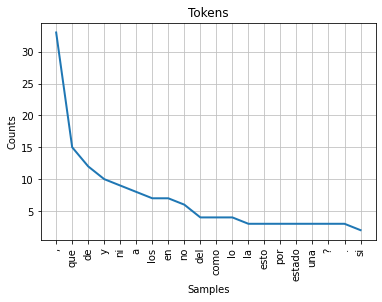

In [ ]:
#distribucion de frecuencia de las palabras usando nltk
freq = nltk.FreqDist(tokens)

#grafico de la distribución de frecuencias
freq.plot(20, cumulative=False, title="Tokens")

Como aparecen algunos signos de puntuación ( , ? . ), vamos a utilizar la función *regexp_tokenize* para obtener tokens más precisos.

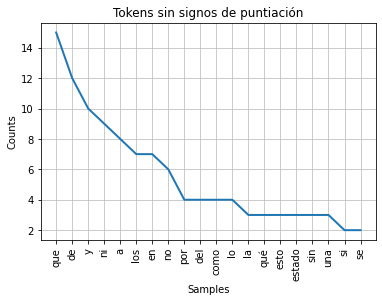

In [ ]:
tokens = regexp_tokenize(sentence, pattern="\w+")

#distribucion de frecuencia de las palabras usando nltk
freq = nltk.FreqDist(tokens)

#grafico de la distribución de frecuencias
freq.plot(20, cumulative=False, title = "Tokens sin signos de puntiación")

In [ ]:
#buscamos las palabras de parada en español
from nltk.corpus import stopwords
sr = stopwords.words('spanish')

In [ ]:
#limpiamos los tokens
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('spanish'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

#for key,val in freq.items():
#    print (str(key) + ':' + str(val))

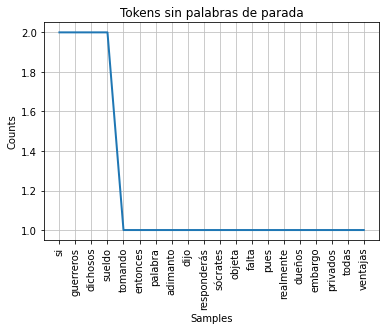

In [ ]:
#grafica con los tokens sin palabras de parada
freq.plot(20, cumulative=False, title = "Tokens sin palabras de parada")

In [ ]:
#para generar n-gramas
from nltk.util import ngrams
cuatrigrama = ngrams(tokens,4)
cuatrigrama = [ ' '.join(grams) for grams in cuatrigrama]

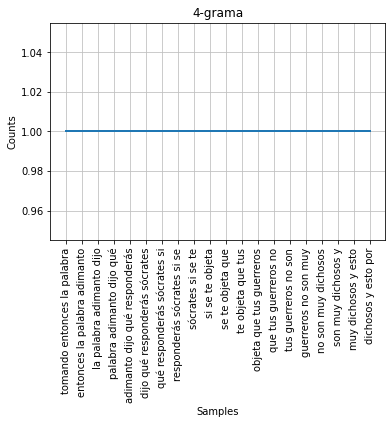

In [ ]:
#grafica con los cuatrigramas
freq = nltk.FreqDist(cuatrigrama)
freq.plot(20, cumulative=False, title = "4-grama")